In [ ]:
'''
머신러닝 데이터 전처리

1. 레이블 인코딩
'''
from sklearn.preprocessing import LabelEncoder

items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값 : ", labels)
print("인코딩 클래스 : ", encoder.classes_)
print("디코딩 원본값 : ", encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값 :  [0 1 5 4 2 3 2]
인코딩 클래스 :  ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'tv' '냉장고' '냉장고' '선풍기' '선풍기']


In [ ]:
'''
머신러닝 데이터 전처리

2. One Hot 인코딩
'''
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]

# 2차원 데이터로 변환해야함
items = np.array(items).reshape(-1,1)

ohe = OneHotEncoder()
ohe.fit(items)
oh_label = ohe.transform(items)

print(oh_label.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


두 가지 방법을 통해 범주형 데이터 처리

## 예측값

**정확도(accuracy)**

전체의 경우 중에 맞은 경우에 대한 확률, (TN+TP) / (전체)

**정밀도 (precision)**

맞다고 예측한 애들 중에 실제로 맞은것의 비율, TP / (FP+TP)

**재현율 (recall)**

실제로 맞은 사람들 중에 맞았다고 예측한 애들의 비율, TP / (FN+TP)

**F1 스코어**

정밀도와 재현율은 서로 트레이드오프 관계, 둘 다 높은 점수를 맞아야 좋은 모델이라 할 수 있음
F1 스코어는 정밀도와 재현율의 조화 평균, 2 / [(1/recall) + (1/precision)]

**ROC, AUC**

맞출 때마다 TPR(수직) 방향으로 한 칸씩 올라갑니다. 그리고 틀리면 FPR(수평) 방향으로 이동

In [ ]:
# 정확도 (accurcy)
from sklearn.metrics import accuracy_score
# accuracy_score(정답, 예측)

# 정밀도 (precision)
from sklearn.metrics import precision_score
# precision_score(정답, 예측)

# 재현율 (recal)
from sklearn.metrics import recall_score
# recal_score(정답, 예측)

# F1 스코어
from sklearn.metrics import f1_score
# f1_score(정답, 예측)

# ROC, AUC
from sklearn.metrics import roc_auc_score
# roc_auc_score(정답, 예측)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

**StandardScaler()**

• 평균이 0이고 분산이 1인 정규 분포로 만드는 것

• 표준편차란 평균으로부터 얼마나 떨어져있는지를 구한 것

**MinMaxScaler()**

• 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization

• 이상치에 취약.

**MaxAbsScaler()**

• MaxAbsScaler는 MinMaxScaler와 비슷

• 방법의 이름에서도 알 수 있듯이 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 만들어줌.

• 즉, 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가짐.

• 마찬가지로, 이상치의 영향을 크게 받기 때문에 이상치가 존재할 경우 이 방법은 적절하지 않음.

**RobustScaler()**

• StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 중간값(median)과 사분위값(quartile)을 사용

• 이상치의 영향을 최소화

• 표준화 후 데이터가 더 넓게 분포

**Normalizer()**

• 열(Columns)을 대상으로 함

• 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값 생성

• 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있다

In [ ]:
'''
keras를 이용한 MNIST 숫자 인식
'''
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


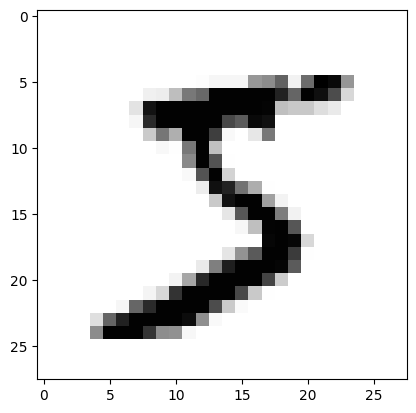

In [ ]:
# 데이터 정규화 0.0 ~ 1.0으로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow (x_train[0], cmap = "Greys")

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 학습
model.fit(x_train, y_train, epochs = 5)

# 결과
score = model.evaluate(x_test, y_test)
print("손실률 : ", score[0])
print("정확도 : ", score[1])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9304 - loss: 0.2408
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9342 - loss: 0.2224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9403 - loss: 0.2071
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9476 - loss: 0.1830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9506 - loss: 0.1723
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9472 - loss: 0.1795
손실률 :  0.15688958764076233
정확도 :  0.9538999795913696


In [ ]:
'''
Keras를 이용한 fashion MNIST
'''
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
mean, std = x_train.mean(), x_train.std()
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 5)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("손실률 : ", score[0])
print("정확도 : ", test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7824 - loss: 0.5921
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8579 - loss: 0.3854
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8737 - loss: 0.3369
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8841 - loss: 0.3118
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8875 - loss: 0.2989
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3525
손실률 :  2.3026273250579834
정확도 :  0.8751000165939331


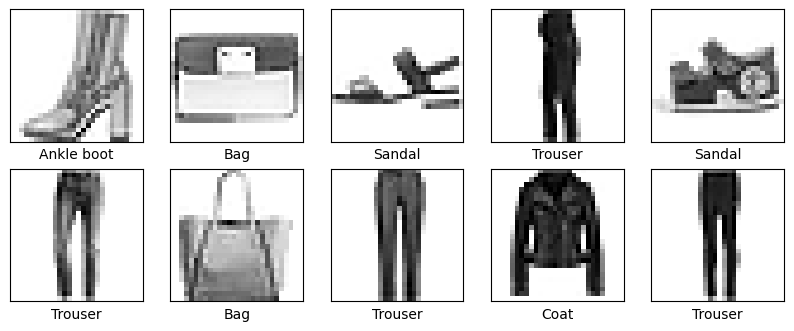

In [ ]:
# Fashion MNIST incoding
import tensorflow as tf
from tensorflow import keras

import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

samples = np.random.randint(0, 60000, 10)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[samples[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[samples[i]]])

plt.show()


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# Sepal Length, Sepal Width, Petal Length and Petal Width

print(x_train.shape)
print(x_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation = "relu", input_shape = (4,)))
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = "softmax"))

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 0.2를 검증데이터 set으로 사용
history = model.fit(x_train, y_train, batch_size = 16, epochs=100, validation_split=0.2, verbose=1)
# model.fit(x_train, y_train, batch_size = 16, epochs=100, verbose=1)


score = model.evaluate(x_test, y_test)
print("손실률 : ", score[0])
print("정확도 : ", score[1])

# Visualization
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

(120, 4)
(30, 4)
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3811 - loss: 1.0503
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4324 - loss: 1.0088  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4451 - loss: 0.9662 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5643 - loss: 0.8820 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6238 - loss: 0.7927 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4882 - loss: 0.8756  
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5425 - loss: 0.8262  
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6099 - loss: 0.7712  
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - loss: 0.7825 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6588 - loss: 0.7069 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6215 - loss: 0.7304 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.6066

In [ ]:
'''
SVM (Support Vector Machine)

Classification, Regression 모두 사용
'''

# Classifier Model
from sklearn.svm import SVC

# 이진 분류기 때문에 linear로 kernel 설정
classifier = SVC(kernel = 'linear')

x_train = [[1,2], [1,5], [2,2], [2,5], [3,2], [3,5], [4,2], [4,5]]
y_train = [1,1,1,1,0,0,0,0]

classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
print(classifier.predict([[2,2]]))

[1]


In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [ ]:
iris = load_iris()
x_index = 0
y_index = 1

<function matplotlib.pyplot.show(close=None, block=None)>

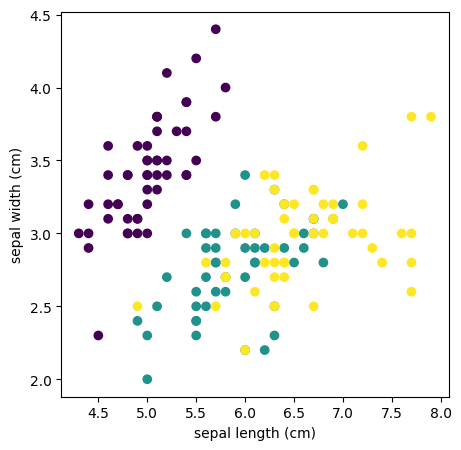

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import plot_tree

df = pd.read_csv("./penguins.csv")

columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
df_cleaned = df.dropna(subset=columns_to_check)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


모델 정확도: 1.00


<ipython-input-135-c8cb23dd23e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = le.fit_transform(X['sex'])


[Text(0.640625, 0.9285714285714286, 'flipper_length_mm <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]\nclass = Adelie'),
 Text(0.46875, 0.7857142857142857, 'bill_length_mm <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]\nclass = Adelie'),
 Text(0.5546875, 0.8571428571428572, 'True  '),
 Text(0.3125, 0.6428571428571429, 'bill_length_mm <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]\nclass = Adelie'),
 Text(0.1875, 0.5, 'bill_depth_mm <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]\nclass = Adelie'),
 Text(0.125, 0.35714285714285715, 'bill_length_mm <= 39.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]\nclass = Adelie'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]\nclass = Adelie'),
 Text(0.4375, 0.5, 'fli

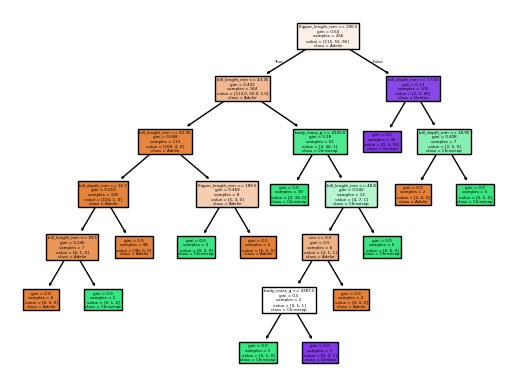

In [ ]:
# 1. 데이터 전처리
# 독립변수와 종속변수 분리
X = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df_cleaned['species']

# 범주형 데이터 인코딩
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
y = le.fit_transform(y)

# 2. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 의사결정 트리 모델 생성 및 학습
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. 모델 평가
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.2f}")

# 5. 결정 트리 시각화
plot_tree(clf, feature_names=list(X.columns), class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
# plt.show()

# PDF로 저장
# plt.savefig("./penguins.pdf", format="pdf")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
import os

# 압축 파일 경로와 압축 해제 폴더 경로
zip_file_path = "/content/shapes.zip"
extract_to_path = "/content/shapes_extracted"

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# 압축 해제된 파일 확인
print("압축 해제 완료!")
print("파일 목록:")
print(os.listdir(extract_to_path))

압축 해제 완료!
파일 목록:
['__MACOSX', 'shapes']


In [ ]:
import shutil

# 삭제할 폴더 경로
directory_to_delete = "/content/shapes_"

# 폴더 삭제
shutil.rmtree(directory_to_delete)

print(f"{directory_to_delete} 디렉터리가 삭제되었습니다.")


/content/shapes_ 디렉터리가 삭제되었습니다.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# 데이터 경로 설정
base_dir = '/content/shapes'

# 데이터 증강 및 로드
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 데이터의 20%를 검증용으로 사용
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),  # 이미지 크기 조정
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3개의 클래스 (circle, square, triangle)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# 모델 평가
test_loss, test_acc = model.evaluate(val_generator)
print(f"테스트 정확도: {test_acc:.2f}")

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3121 - loss: 1.9650 - val_accuracy: 0.3333 - val_loss: 1.0996
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 902ms/step - accuracy: 0.3299 - loss: 1.1107 - val_accuracy: 0.3333 - val_loss: 1.1022
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2932 - loss: 1.1065 - val_accuracy: 0.3333 - val_loss: 1.0957
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 886ms/step - accuracy: 0.3454 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.0917
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3703 - loss: 1.0864 - val_accuracy: 0.5333 - val_loss: 1.0695
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5619 - loss: 1.0512 - val_accuracy: 0.5167 - val_loss: 1.0064
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 896ms/step - accuracy: 0.5906 - loss: 0.9565 - val_accuracy: 0.4333 - val_loss: 1.0020
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5929 - loss: 0.8654 - val_accuracy: 0.6000 - val_loss: 0.9738
Epoch 9/10
8/8

In [ ]:
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

circles_folder = "/content/shapes/circles"
squares_folder = "/content/shapes/squares"
triangles_folder = "/content/shapes/triangles"

images = []
labels = []

for folder, label in [(circles_folder, 0), (squares_folder, 1), (triangles_folder, 2)]:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3446 - loss: 1.3355 - val_accuracy: 0.3542 - val_loss: 1.2748
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3356 - loss: 1.2337 - val_accuracy: 0.3542 - val_loss: 1.1743
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3443 - loss: 1.1411 - val_accuracy: 0.4167 - val_loss: 1.0775
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3330 - loss: 1.1027 - val_accuracy: 0.2500 - val_loss: 1.0972
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3384 - loss: 1.0945 - val_accuracy: 0.3750 - val_loss: 1.0740
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3905 - loss: 1.0769 - val_accuracy: 0.5000 - val_loss: 1.0865
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3667 - loss: 1.0681 - val_accuracy: 0.4375 - val_loss: 1.0662
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4214 - loss: 1.0813 - val_accuracy: 0.3542 - val_loss: 1.

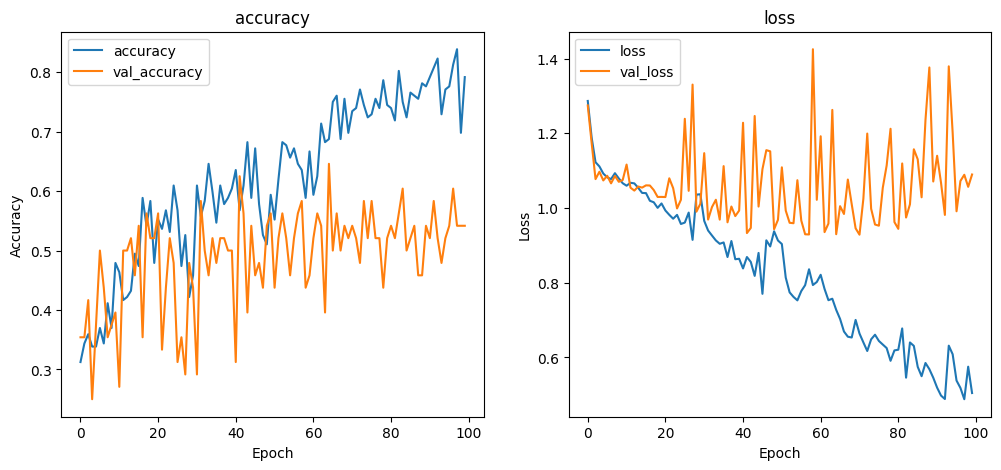

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(images, labels, shuffle=True, test_size=0.2, random_state=42)

# 픽셀 값을 0~1 범위로 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1차원 벡터로 변환
x_train = x_train.reshape(-1, 28, 28)  # (samples, height, width)
x_test = x_test.reshape(-1, 28, 28)

# NN 모델 정의
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # 학습 데이터의 20%를 검증용으로 사용
    epochs=100,
    batch_size=32,
)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.2f}")

plt.figure(figsize=(12, 5))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
